In [1]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import tensorflow_probability as tfp

from training import create_models
from models import Model, DefaultDenseModel, DefaultConvModel, McDropoutModel, BayesByBackpropModel
import commons

Tensorflow Version: 2.0.0-beta1
Tensorflow Probability Version: 0.8.0-dev20190619
Found GPU: /device:GPU:0


In [2]:
dataset_size = 1.0
embedding_dim = 50
words_per_sentence = 2800
batch_size = 128
epochs = 50

glove_dir = "D:/google drive/haw/master/mastertheisis/hauptprojekt/glove"
history_evaluation_folder = "D:/google drive/haw/master/mastertheisis/hauptprojekt/evaluation/history/"
models_dir = "D:/google drive/haw/master/mastertheisis/hauptprojekt/training/models"
history_dir = "D:/google drive/haw/master/mastertheisis/hauptprojekt/training/history"

setup = commons.setup(glove_dir=glove_dir,
                      embedding_dim=embedding_dim,
                      dataset_size=dataset_size,
                      words_per_sentence=words_per_sentence)
models = create_models(setup, models_dir, history_dir)

Found 400000 word vectors.
17361/88587 unknown words


Loaded history successfully. Last epoch: 75
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


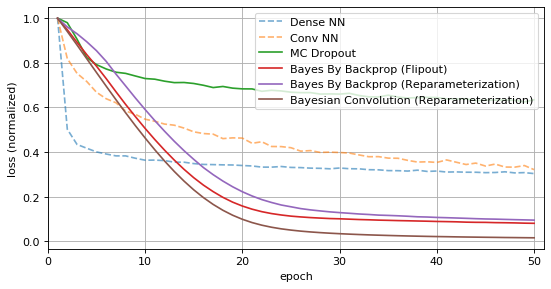

Loaded history successfully. Last epoch: 75
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


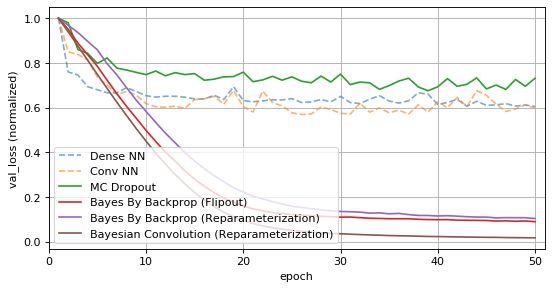

Loaded history successfully. Last epoch: 75
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


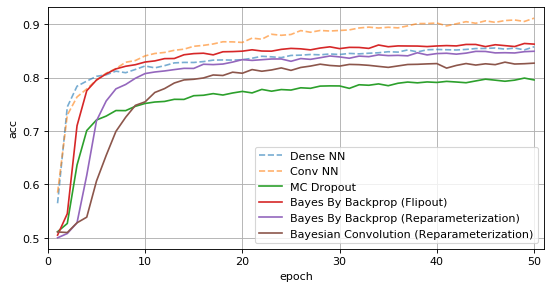

Loaded history successfully. Last epoch: 75
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


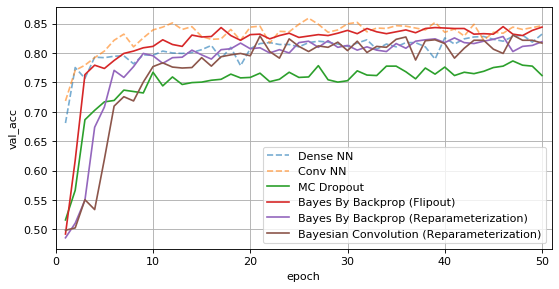

Loaded history successfully. Last epoch: 75
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


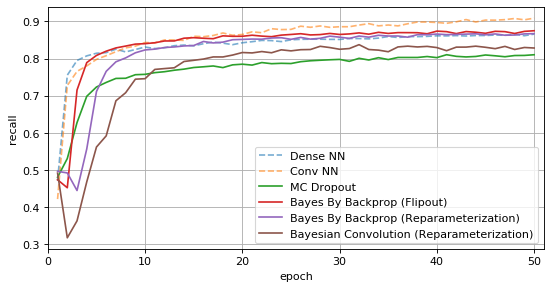

Loaded history successfully. Last epoch: 75
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


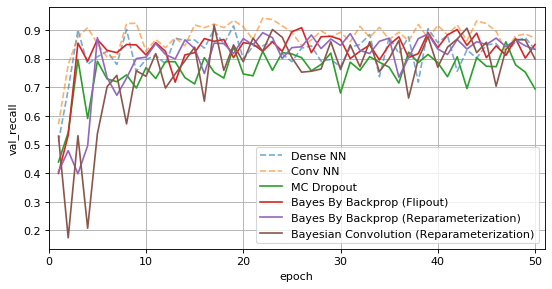

Loaded history successfully. Last epoch: 75
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


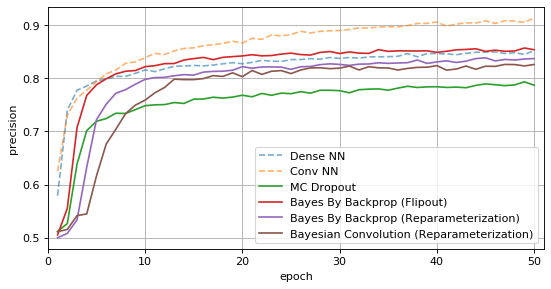

Loaded history successfully. Last epoch: 75
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


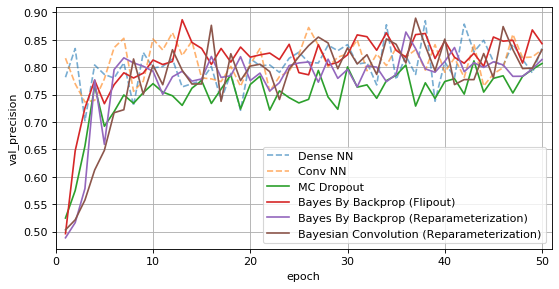

Loaded history successfully. Last epoch: 75
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


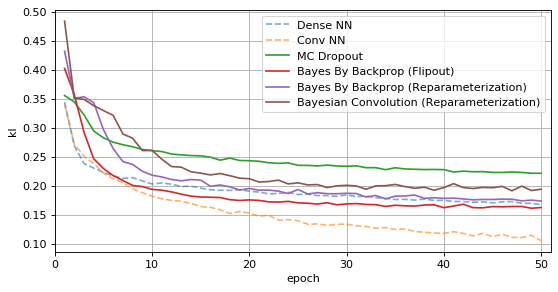

Loaded history successfully. Last epoch: 75
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


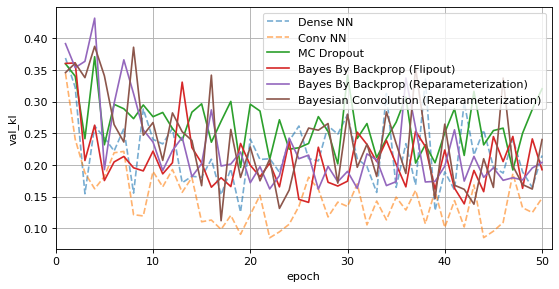

In [4]:
# evaluate history
def plot_metric(col_name, is_training=True, normalize=False):
    figure(num=None, figsize=(8, 4), dpi=80)

    for model in models:
        (history, last_epoch) = model.load_history()
        y_label = col_name

        if is_training:
            col = col_name
        else:
            col = "val_%s" % col_name
            y_label = col

        if normalize:
            norm_factor = 1./np.max(history[col][:50])
            y_label += (" (normalized)")
        else:
            norm_factor = 1.
            
        if model.is_variational():
            linestyle = "-"
            alpha = 1.0
        else:
            alpha = 0.6
            linestyle = "--"
            
        plt.plot(np.arange(1, epochs + 1, 1), history[col][:50] * norm_factor, alpha=alpha, linestyle=linestyle)


    plt.legend([model.readable_name() for model in models])
    plt.xlabel("epoch")
    plt.ylabel(y_label)
    plt.xlim([0, epochs + 1])
    plt.grid()
    plt.savefig(history_evaluation_folder + str(int(models[0].N)) + "_" + col + ".svg")
    plt.show()


plot_metric("loss", True, normalize=True)
plot_metric("loss", False, normalize=True)

for metric in ["acc", "recall", "precision", "kl"]:
    plot_metric(metric, True)
    plot_metric(metric, False)


In [88]:
x_test, y_test = commons.load_imdb(0.25)[1]
x_test_padded = commons.pad_input(x_test, words_per_sentence)

In [89]:
def evaluate_datasizes(x_test_padded, y_test, data_sizes=[1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.01]):
    y_N = []
    Ns = []
    for dataset_size in data_sizes:
        setup = commons.setup(glove_dir=glove_dir,
                              embedding_dim=embedding_dim,
                              dataset_size=dataset_size,
                              words_per_sentence=words_per_sentence)
        models = create_models(setup, models_dir, history_dir)
        N = models[0].N

        Ns += [N]
        y_Ni = []
        for model in models:
            evaluations = model.load_model().evaluate(x_test_padded, y_test)
            y_Ni += [evaluations]
        y_N += [y_Ni]
    
    return (Ns, y_N)

Ns, y_N = evaluate_datasizes(x_test_padded, y_test)

Found 400000 word vectors.
17361/88587 unknown words
using saved model
6250/6250 [==============================] - 4s 702us/sample - loss: 0.4538 - acc: 0.8376 - true_negatives: 2574.0000 - false_negatives: 448.0000 - true_positives: 2661.0000 - false_positives: 567.0000 - precision: 0.8243 - recall: 0.8559 - kl: 0.1851
using saved model
6250/6250 [==============================] - 6s 960us/sample - loss: 0.3340 - acc: 0.8557 - true_negatives: 2733.0000 - false_negatives: 494.0000 - true_positives: 2615.0000 - false_positives: 408.0000 - precision: 0.8650 - recall: 0.8411 - kl: 0.1783
using saved model
6250/6250 [==============================] - 5s 825us/sample - loss: 0.4901 - acc: 0.7691 - true_negatives: 2247.0000 - false_negatives: 549.0000 - true_positives: 2560.0000 - false_positives: 894.0000 - precision: 0.7412 - recall: 0.8234 - kl: 0.2068
using saved model
6250/6250 [==============================] - 9s 1ms/sample - loss: 0.9557 - acc: 0.8408 - true_negatives: 2650.0000 - f

In [90]:
metric_names = models[0].load_model().metrics_names
y_N = np.array(y_N)

for i in range(len(models)):
    evaluation = y_N_new[:,i]
    df = pd.DataFrame(evaluation, columns=metric_names)
    df["N"] = Ns
    df.to_csv(history_evaluation_folder + models[i].model_id() + "_varrying_n.csv", sep=";")

using saved model


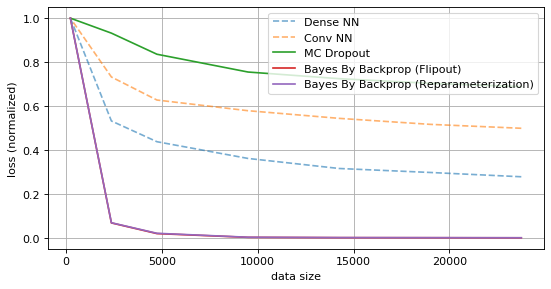

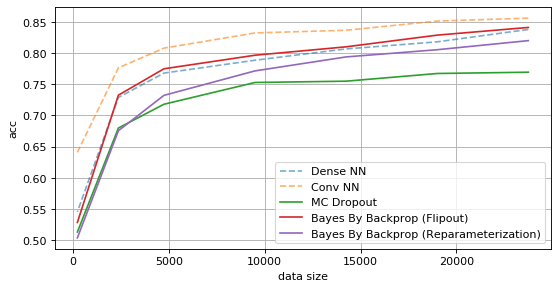

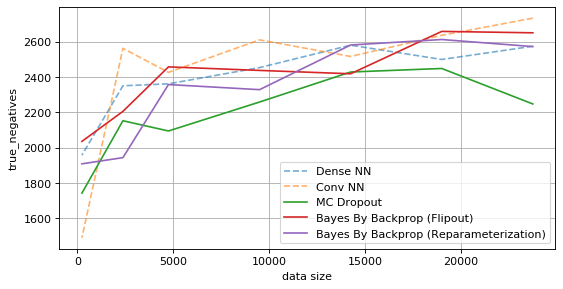

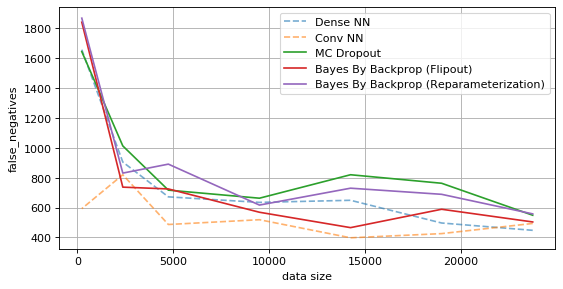

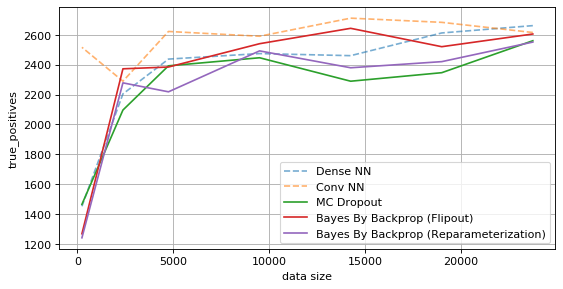

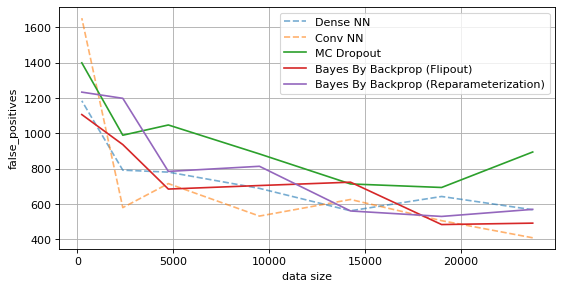

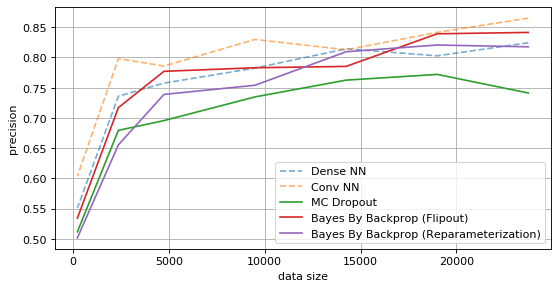

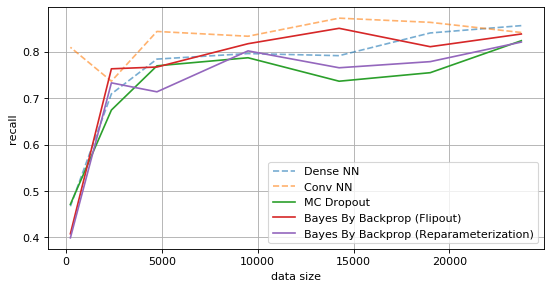

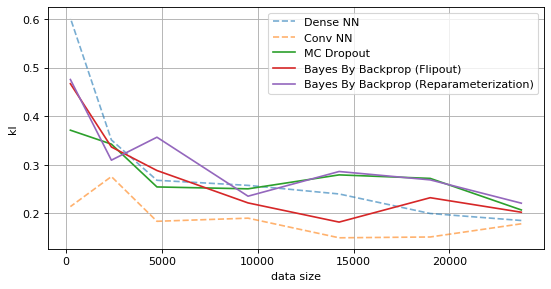

In [98]:
for i in range(len(metric_names)):
    metric = metric_names[i]
    figure(num=None, figsize=(8, 4), dpi=80)
    for m in range(len(models)):
        model = models[m]
        y_label = metric

        if model.is_variational():
            linestyle = "-"
            alpha = 1.0
        else:
            alpha = 0.6
            linestyle = "--"
        
        if metric == "loss" or metric == "val_loss":
            norm_factor = 1./np.max(y_N[:,m,i])
        else:
            norm_factor = 1.

        plt.plot(Ns, y_N[:,m,i] * norm_factor, alpha=alpha, linestyle=linestyle)   
        
    if metric == "loss" or metric == "val_loss":
        y_label += (" (normalized)")
        
    plt.legend([model.readable_name() for model in models])
    plt.xlabel("data size")
    plt.ylabel(y_label)
    plt.grid()
    plt.savefig(history_evaluation_folder + str(int(models[0].N)) + "_" + metric + "_varrying_n" + ".svg")
    plt.show()